<a href="https://colab.research.google.com/github/Romyshufman/data-structures-proj2/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 3

## Instructions

* The course will be using an automatic grading system.
* After each question there will appear a code block with some prepared code to add your answer to a dictionary that will be converted into a data frame, saved as CSV and uploaded to moodle for grading.
* Please do not edit any code other than in placeholders marked `#### your code here ####`, **notice the answer could also be a simple number or string, not an actual code**
* Don't forget to run the code block after you write your answer.
* You can add code blocks wherever you want in order to interact with datasets and play with your own code.
* In the next code block please fill in your ID number and email account as strings in the appropriate places.
* And don't forget to run the block!

In [1]:
ans = {}
ans['HW'] = 'HW3'
ans['id_number'] = '209365238'
ans['email'] = 'romyshufman18@gmail.com'

## Mora Pandas

### Q1.
Behold the `fifa_wide` DF. There's only so much we can do with it in current form.

In [2]:
import pandas as pd
import numpy as np

fifa_d = {'Country': ['France', 'Germany', 'Spain', 'Argentina', 'Brazil'],
      'Continent': ['Europe', 'Europe', 'Europe', 'South America', 'South America'],
      '2014': [7, 1, 23, 2, 4],
      '2018': [1, 22, 10, 16, 6],
      '2022': [2, 17, 13, 1, 7]}

fifa_wide = pd.DataFrame(fifa_d)
print(fifa_wide)

     Country      Continent  2014  2018  2022
0     France         Europe     7     1     2
1    Germany         Europe     1    22    17
2      Spain         Europe    23    10    13
3  Argentina  South America     2    16     1
4     Brazil  South America     4     6     7


Which of the following Pandas methods would be **most easy** to make `fifa_wide` into `fifa_long`, a table with 4 columns (say `[Country, Continent, Year, Rank]`) and 15 rows, holding for each country, for each World Cup year, its Rank.

1. `pd.pivot()`
2. `pd.get_dummies()`
3. `pd.melt()`
4. `pd.merge()`

In [3]:
ans['Q1'] = 3

We have downloaded from [Gapminder data repository](https://www.gapminder.org/data/) the life expectancy data for all countries in the years 1900-1999. 

* Upload the `life_expectancy_years.csv` file from Moodle, however you want.
* Extract from this dataset countries that have data for all years in the range 1900-1999 (i.e. you should discard countires with `Nan` values in years 1900-1999).
* You should get 184 countries.
* Create for each of these the average age for each decade (1900-1909, 1910-1919,...), resulting with a matrix of 184 countries (rows) times 10 decades averages (the country's name is an extra column, so 11 columns).


**Important:** There are many ways to do this manipulation. Looping isn't a sin, but you should know where to use it.

**Sanity check:** the maximum value at the 90s (1990-1999) should be about `80.11`

In [4]:
df_pop = pd.read_csv('life_expectancy_years.csv')

In [5]:
cols_to_keep=['country']+[str(year) for year in range(1900, 2000)]
df1=df_pop[cols_to_keep]. dropna()
df_melted= df1.melt(id_vars=['country'], var_name='year', value_name='LE')
years= [str(year) for year in range (1970, 1980)]
df2=df_melted[df_melted['year'].isin(years)]
print(df2.sort_values(by='LE',ascending=False))
print(df_melted)

        country  year    LE
14599    Greece  1979  77.4
14415    Greece  1978  76.9
14608   Iceland  1979  76.3
14617     Japan  1979  76.3
14424   Iceland  1978  76.1
...         ...   ...   ...
14011  Cambodia  1976  24.8
14195  Cambodia  1977  24.6
14379  Cambodia  1978  24.3
14563  Cambodia  1979  24.1
13274   Burundi  1972  18.5

[1840 rows x 3 columns]
                   country  year    LE
0              Afghanistan  1900  29.4
1                  Albania  1900  35.4
2                  Algeria  1900  30.2
3                   Angola  1900  29.0
4      Antigua and Barbuda  1900  33.8
...                    ...   ...   ...
18395            Venezuela  1999  70.1
18396              Vietnam  1999  71.3
18397                Yemen  1999  62.8
18398               Zambia  1999  45.6
18399             Zimbabwe  1999  47.5

[18400 rows x 3 columns]


### Q2.
Which country had the highest life expectancy in the 1970s (1970-1979) ? 

1. Japan
2. Greece
3. Switzerland
4. Norway

In [6]:
ans['Q2'] = 2

In [7]:
df_melted['decade']=((pd.to_numeric(df_melted['year']))%1900)//10
df1=df_melted
df3 = df1.groupby(['country', 'decade']).agg({'LE': 'mean'})
df3.reset_index(inplace=True)
vals = df3['LE'].to_numpy()
minus= [vals[i] - vals[i+1] for i in range(len(vals)-1)] + [0]
plus= [0] + [vals[i+1] - vals[i] for i in range(len(vals)-1)]
df3['bigger than next year'] = minus
df3['bigger than last year'] = plus
df3['isBiggerThanNextYear'] = df3['bigger than next year']>0
df3['isBiggerThanLastYear'] = df3['bigger than last year']>0
df3['peak']=df3['isBiggerThanNextYear']*df3['isBiggerThanLastYear']
df3=df3[['country', 'decade', 'LE','isBiggerThanNextYear', 'isBiggerThanLastYear', 'peak']]
df4= df3[df3['decade'].isin([1,2,3,4,5,6,7,8])]
df4=df4[df4['peak']]
countrys=df4['country'].drop_duplicates()
print(len(countrys))

72


### Q3.
How many countries had at least 1 "peak" decade? A peak decade is a decade which had a higher life expectancy compared to both the deacdes before and after it (the 1900s and 1990s cannot be called that here)

1. 62
2. 72
3. 78
4. 91

In [8]:
ans['Q3'] = 2

In [9]:
df5=df3[['country', 'decade', 'isBiggerThanLastYear']]
df5=df5[df5['isBiggerThanLastYear']==False]
df5=df5.groupby(by='decade').agg({'isBiggerThanLastYear':'count'})
df5.reset_index(inplace=True)
df5['precentBiggerThanLastYear']=df5['isBiggerThanLastYear']/184
df=df5
print(df.sort_values(by='isBiggerThanLastYear', ascending=False))


   decade  isBiggerThanLastYear  precentBiggerThanLastYear
0       0                   184                   1.000000
1       1                   130                   0.706522
8       9                    37                   0.201087
4       4                    30                   0.163043
3       3                    12                   0.065217
6       7                    10                   0.054348
7       8                     8                   0.043478
2       2                     1                   0.005435
5       5                     1                   0.005435


### Q4.
In which decade did most countries experience a decrease in life expectancy compared to the previous decade? (see if you can think of a reason) E.g. if you check from 1980s to 1990s about 20% of countries decreased in life expectency.

1. 1910s compared to 1900s
2. 1920s compared to 1910s
3. 1940s compared to 1930s
4. 1950s compared to 1940s

In [10]:
ans['Q4'] = 1

## Summary Statistics

### Q5.
We have 101 observations for length of hospital stays, with maximum value 95 days, minimum 7 days, and average and median both 50 days. Now assume some software bug is causing the data to change from being measured in days to minutes (the length is multiplied by 24*60=1440). What is the minimal number of observations needed to change before the average exceeds 100?

1. 1
2. 5
3. 10
4. 51

In [11]:
ans['Q5'] = 1

### Q6.
In the same setting, what is the minimal number of observations needed to change before the median exceeds 100? 

1. 1
2. 10
3. 51
4. 100

In [12]:
ans['Q6'] = 3

### Q7.
Assume the pollution in city A is exactly double that in city B every day. We measure the pollution in city A over 100 days and put it in a vector $x=(x_1, \dots, x_{100})$ and in city B over the same 100 days giving $y=(y_1, \dots, y_{100})$. We also consider the vectors $u=(log(x_1), \dots ,log(x_{100}))$ and $v = (log(y_1), \dots ,log(y_{100}))$. Which of the following holds: 

1. $u_{10}$ (the 10th observation in $u$) is double $v_{10}$ 
2. The dispersion of $x$ is bigger than of $y$, but the dispersion of $u$ is equal to that of $v$
3. If $x_{10}$ > $y_{10}$ then $u_{10} < v_{10}$
4. None of the above 	

In [13]:
ans['Q7'] = 2

## Basic Scraping

Consider the following html snippet:

In [14]:
html_doc = """

    <html><head><title>The Dormouse's story</title></head>
    <body>
    <p class="title"><b>The Dormouse's story</b></p>

    <p class="story">Once upon a time there were three little sisters; and their names were
    <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
    <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
    <a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
    and they lived at the bottom of a well.</p>

    <p class="story">Here is an image of Elsie: <a href="http://example.com/elsie"><img src = "elsie.png"></a></p>
    <p class="story">And here is an image of Lacie: <a href="http://example.com/lacie"><img src = "lacie.png"></a></p>
    """

### Q8.
We would like to get a list of the three little sisters names. Fill in the missing line of the following function:

```python    
    from bs4 import BeautifulSoup

    soup = BeautifulSoup(html_doc)

    def get_sisters_names(soup):
        # missing line 1 #
        return [sister.get_text() for sister in sisters]
```

1. `sisters = soup.find_all('sister')`
2. `sisters = soup.find_all('a')`
3. `sisters = soup.find_all(class = 'sister')`
4. `sisters = soup.find_all('a', {'class': 'sister'})`

In [15]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_doc)

def get_sisters_names(soup):
    sisters = soup.find_all('a', {'class': 'sister'})
    print([sister.get_text() for sister in sisters])

get_sisters_names(soup)

# sisters = soup.find_all('sister')`
# sisters = soup.find_all('a')`
# sisters = soup.find_all(class = 'sister')`
# sisters = soup.find_all('a', {'class': 'sister'})`

['Elsie', 'Lacie', 'Tillie']


In [16]:
ans['Q8'] = 4

### Q9.
Now we would like to get only the raw text of the Dormouse story, not including the title. Fill in the missing lines of the following function:

```python    

```    def get_story(soup):
        # missing line 1 #
        story = ''
        for p in paragraphs:
            # missing line 2 #
            if class_name == 'story':
                story += p.get_text() + ' '
        return ' '.join(story.split())

1. line 1: `paragraphs = soup.find_all('p', {'class': 'story'})`; line 2: `class_name = p['class']`
2. line 1: `paragraphs = soup.find_all('p')`; line 2: `class_name = p['class'][0]`
3. line 1: `paragraphs = soup.find_all('p', {'class': 'story'})`; line 2: `class_name = p.find('class')[0]`
4. line 1: `paragraphs = soup.find_all('story')`; line 2: `class_name = p.attr['class']`

In [17]:
def get_story(soup):
    paragraphs = soup.find_all('p')    
    story = ''
    for p in paragraphs:
        class_name = p['class'][0]
        if class_name == 'story':
                story += p.get_text() + ' '
    return ' '.join(story.split())

get_story(soup)

'Once upon a time there were three little sisters; and their names were Elsie, Lacie and Tillie; and they lived at the bottom of a well. Here is an image of Elsie: And here is an image of Lacie:'

In [18]:
ans['Q9'] = 2

### Q10.
What will be the result of calling the following function on our `soup` object (i.e. `does_something(soup)`)?

```python    
    def does_something(soup):
        return [e['src'].split('.')[0] for e in soup.find_all('img')]
```

1. `['elsie.png', 'lacie.png']`
2. `['elsie', 'lacie']`
3. `{'src': ['elsie', 'lacie']}`
4. The function will throw an exception on our `soup` object

In [19]:
ans['Q10'] = 2

## Scraping ebay

Go to [ebay.com](ebay.com) and search for little boys t-shirts. The ebay website, like any modern website, is filled with text, images and links. But if you are using Google Chrome and you right-click on any page and choose "View page source" you will see the raw HTML script behind it.

Run the following piece of code

In [20]:
from bs4 import BeautifulSoup
import requests

url = 'https://il.ebay.com/b/Boys-Tops-Shirts-T-Shirts-for-Boys/260966/bn_1642883?rt=nc&LH_ItemCondition=1000&LH_BIN=1&LH_PrefLoc=3&_pgn=1'
r = requests.get(url)
soup = BeautifulSoup(r.content, 'lxml')

The above code imports Beautiful Soup, imports the requests library for handling web connections, assigns an ebay search results page address to a variable called `url`, "requests" this URL, stores the response in a variable called `r`, makes a `BeautifulSoup` object out of the response's `content`, and assigns it to a variable called `soup`.

It is advised to visit the url using your browser, so you will have a visual understanding of what you are doing.

Print the raw HTML:

In [21]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<!--[if IE 9]><html class="ie9" lang="en"><![endif]-->
<!--[if gt IE 9]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="Shop eBay for great deals on Boys Tops, Shirts &amp; T-Shirts for Boys. You'll find new or used products in Boys Tops, Shirts &amp; T-Shirts for Boys on eBay. Free shipping on selected items." name="description"/>
  <title>
   Boys Tops, Shirts &amp; T-Shirts for Boys | eBay
  </title>
  <meta content="unsafe-url" name="referrer"/>
  <meta content="Boys Tops, Shirts &amp; T-Shirts for Boys | eBay" property="og:title"/>
  <link href="https://ir.ebaystatic.com" rel="'preconnect'"/>
  <meta content="34E98E6F27109BE1A9DCF19658EEEE33" name="msvalidate.01"/>
  <meta content="Shop eBay for great deals on Boys Tops, Shirts &amp; T-Shirts for Boys. You'll find new or used products in Boys Tops, Shirts &amp; T-Shirts for Boys on eBay. Free shipping on selected items." property="og:description"/>
  <meta content="ebay-o

### Q11.
What is the page's title? Replace `#### your code here ####` to get the title as a simple string, without html tags.

In [22]:
url_title = soup.title.text
print(url_title)
ans['Q11'] = url_title

Boys Tops, Shirts & T-Shirts for Boys | eBay


Find the all hyperlinks on page (no credit):

In [23]:
all_links = soup.find_all('a')
print('all_links is a: ' + str(type(all_links)))
print()
print('first 5 elements in all_links:')
print(all_links[:5])

all_links is a: <class 'bs4.element.ResultSet'>

first 5 elements in all_links:
[<a class="gh-acc-a" href="#mainContent" id="gh-hdn-stm">Skip to main content</a>, <a _sp="m570.l2586" href="https://www.ebay.com/" id="gh-la"><img alt="eBay Logo" height="200" id="gh-logo" src="https://ir.ebaystatic.com/rs/v/fxxj3ttftm5ltcqnto1o4baovyl.png" style="clip:rect(47px, 118px, 95px, 0px); position:absolute; top:-47px;left:0" width="250"/></a>, <a _sp="m570.l2614" aria-label="Advanced Search" href="http://www.ebay.com/sch/ebayadvsearch" id="gh-as-a" title="Advanced Search">Advanced</a>, <a href="https://signin.ebay.com/ws/eBayISAPI.dll?SignIn&amp;_trksid=m570.l3348">Sign in</a>, <a _sp="m570.l3188" class="gh-p" data-sp="m570.l3188" href="https://www.ebay.com/globaldeals"> Daily Deals</a>]


### Q12.
What is the class type of `all_links`?

Note: if  the type is <class 'XXXXX'> please write in the answer the correct class (e.g. 'XXXXX' as in this example) 

In [24]:
ans['Q12'] =  'bs4.element.ResultSet'

Find the all images on page (no credit):

In [25]:
images = soup.find_all('img')

Get a `list` of all image titles from the `images` object, **except for the first one**. Print that list (no credit).

Hint: `alt`

In [26]:
image_titles = [images[i]['alt'] for i in range(1, len(images))]
print(image_titles)

['NWT Polo Ralph Lauren Boys Aqua Blue Beach Polo Bear Fleece Sweatshirt', 'BOYS KIDS BREAST CANCER VINEYARD VINES SHIRT BLUE PINK L LARGE 16 Girls Kids', 'Frozen Disney Olaf Blue Short Sleeve Tee Shirt Little Boys 5T', 'FREEZE Sonic The Hedgehog Boys Short Sleeve T-Shirt - All Over Print Design...', 'Boys toddler CHAMPION 2 piece outfit sets shirts shorts all sizes colors', 'Polo Ralph Lauren Spectre Blue Big Pony POLO SHIRT Boys Kids Size Small (8) $49', 'Pajama R Us Boys 5 Pack Ribbed Tank Tops Size 2T/3T 4T/5T 4/5 6/8 10/12 14/16 18', 'Studio 3 Boys Four Pack Assorted Color T-Shirts Size 2T 3T 4T 5T 4 5/6 7', 'Polo Ralph Lauren KIDS SZ 7 Shirt Hawaiian Vacation Hula Print  NWT ', 'Boys toddler New balance 2 and 3 piece outfit sets shirts tank top shorts', 'Boys Dress Shirt Long Sleeve Tie 15 Colors Solid Size 5-20 Big Boy New With Tags', 'Under Armour Youth Boys HeatGear T-Shirt Blue/Red/Orange/Silver/Black Various', 'Hurley Youth 2-Pack Boys UPF 50+ Tops  Swim Shirt, Blue, White, 

We need images JPEG addresses. Some have them as attribute `src`, some as attribute `data-src`. This is one way to combine the two. Make sure you understand:

In [27]:
image_files_src = [img.get('src', None) for img in images[1:]]
image_files_datasrc = [img.get('data-src', None) for img in images[1:]]
image_files = [src if datasrc is None else datasrc for src, datasrc in zip(image_files_src, image_files_datasrc)]
image_files[:5]

['https://i.ebayimg.com/thumbs/images/g/awwAAOSwnX5kLeIH/s-l300.jpg',
 'https://i.ebayimg.com/thumbs/images/g/NwAAAOSwGUZh2vEC/s-l300.jpg',
 'https://i.ebayimg.com/thumbs/images/g/wOIAAOSw1Flj~oD4/s-l300.jpg',
 'https://i.ebayimg.com/thumbs/images/g/JPIAAOSwynlkIvpM/s-l300.jpg',
 'https://i.ebayimg.com/thumbs/images/g/leIAAOSwmNVip-W6/s-l300.jpg']

Let's find a shirt's price.

Go to the url in your browser and use the code inspection tool (F12) to look interactively at the url source code. Find the element that holds price data. Notice that the price may be nested within a few levels of html tags. you are searching for the "lowest" level, the one that holds the price directly.

In our case it is a `span` element with a specific class.

### Q13.
What is the specific class for span elements holding the prices?

In [28]:
price_class ='s-item__price'
ans['Q13'] = price_class

Get all prices:

In [29]:
price_elements = soup.find_all('span', {'class' : price_class})
print(price_elements[:5])

[<span class="s-item__price">ILS 101.60</span>, <span class="s-item__price">ILS 105.09</span>, <span class="s-item__price">ILS 20.87</span>, <span class="s-item__price">ILS 61.67<span class="DEFAULT"> to </span>ILS 108.86</span>, <span class="s-item__price">ILS 20.29<span class="DEFAULT"> to </span>ILS 25.37</span>]


From each of these `price_elements` we extract the actual price text with the `get_text` function:

In [30]:
print(price_elements[1].get_text())

ILS 105.09


Notice all prices come with the "ILS" prefix and then the number. Also you can see some prices come as a range. For this project we decided to simply take the minimum price of the range.

To do so we could split this string to its elements:

In [31]:
print(float(price_elements[1].get_text().split(' ')[1]))

105.09


Putting it in a function and getting all prices:

In [32]:
def parse_price(price_element):
    try:
        price = float(price_element.get_text().split(' ')[1])
    except:
        price = None
    return price

prices = [parse_price(price_e) for price_e in price_elements]
print(prices)

[101.6, 105.09, 20.87, 61.67, 20.29, 65.34, 54.41, 68.03, 50.57, 20.29, 65.19, 47.15, 72.56, 32.67, 61.67, 72.56, 54.41, 58.04, 90.57, 83.31, 101.6, 10.16, 88.9, 47.15, 29.0, 68.86, 72.56, 79.86, 32.63, 85.96, 72.56, 41.93, 127.05, 28.93, 65.19, 101.6, 18.11, 46.43, 68.03, 36.3, 99.83, 42.65, 77.65, 108.86, 85.96, 32.63, 65.3, 65.3]


It's time to actually download the shirts images! The following function accepts an image file address, a shirt title and the file name for the image and attempts to download the image to the current directory with the specified file name:

In [33]:
def download_image(url, title, file_name):
    try:
        response = requests.get(url)    
    except:
        return '', ''
    with open(file_name, "wb") as file:
        file.write(response.content)
    return title, file_name

Download the first image from our page, name it 'test.jpg' (no credit). Make sure it was downloaded correctly and see what the function returns:

In [34]:
download_image(image_files[0],image_titles[0], 'test.jpg')

('NWT Polo Ralph Lauren Boys Aqua Blue Beach Polo Bear Fleece Sweatshirt',
 'test.jpg')

We will now download all of the page's images, using a loop. 

First, create a folder named 'boys' in the current directory. You can do it right here in this notebook!

In [35]:
!mkdir boys

If you want these images in your Google Drive it needs to be mounted, and then (uncomment):

In [36]:
# %cd '/content/drive/MyDrive/Colab Notebooks/Intro_DS_2023/HW/HW3/' # assuming an inner folder called Intro_DS_2023 etc.

# !pwd
# !mkdir boys

### Q14, Q15.
Fill in the blanks to correctly create a dictionary called `images_data` which will hold the `title` of the image, its `file_name`, and the shirt's `price`:

In [37]:
from ipywidgets import IntProgress
from IPython.display import display


your_answer_1 ='file_name'
your_answer_2 = 'price'


images_data = {'title': {},
               your_answer_1: {},
               'price': {}}

f = IntProgress(min = 0, max = len(images[1:])) # instantiate a progress bar
display(f) # display the bar

for i in range(len(images[1:])):
    title, file_name = download_image(image_files[i], image_titles[i], './boys/' + str(i) + '.jpg')
    images_data['title'][i] = title
    images_data['file_name'][i] = file_name
    images_data[your_answer_2][i] = prices[i]
    f.value += 1

        
ans['Q14'] = your_answer_1 
ans['Q15'] = your_answer_2

IntProgress(value=0, max=48)

One thing that would prove useful later on is having a dataset which summarizes all we have gathered. That's what `images_data` is for. We're going to use `pandas` to make it a `DataFrame` we can easily read and write:

In [38]:
import pandas as pd
images_data_df = pd.DataFrame(images_data)
print(images_data_df.shape)
images_data_df.head()

(48, 3)


,title,file_name,price
0,NWT Polo Ralph Lauren Boys Aqua Blue Beach Pol...,./boys/0.jpg,101.60
1,BOYS KIDS BREAST CANCER VINEYARD VINES SHIRT B...,./boys/1.jpg,105.09
2,Frozen Disney Olaf Blue Short Sleeve Tee Shirt...,./boys/2.jpg,20.87
3,FREEZE Sonic The Hedgehog Boys Short Sleeve T-...,./boys/3.jpg,61.67
4,Boys toddler CHAMPION 2 piece outfit sets shir...,./boys/4.jpg,20.29


This was fun, we got 48 images. But we're looking to get times ~200 than that, and the same amount of shirts images for girls. 

The following function was run to get all boys shirts images. Challenge yourself to complete it exactly as we did, but don't run it, we have the images for you!

In [39]:
# run = False # change this to actually run

# if run:
#     boys_url = 'https://il.ebay.com/b/Boys-Short-Sleeve-Sleeve-Tops-T-Shirts-Sizes-4-Up/175521/bn_4278610?rt=nc&LH_ItemCondition=1000&LH_BIN=1&LH_PrefLoc=3&_pgn=1'
#     max_pages = 400
#     boys_items_data = {'title': {}, 'file_id': {}, 'price': {}}

#     f = IntProgress(min = 0, max = max_pages)
#     display(f)

#     all_items_counter = 0

#     for page_num in range(max_pages):
#         url = boys_url + str(page_num)
#         try:
#             r = requests.get(url, "lxml")
#         except:
#             print('Stopped at page: ' + page_num)
#             break
#         soup = BeautifulSoup(r.content)
#         ### get images, image_titles, image_files, prices ###

#         try:
#             assert len(prices) == len(images)
#         except:
#             print('Found unequal number of prices in page_num % d' % page_num)
#             prices = [None] * len(images)

#         for i in range(len(images)):
#             title, file_name = download_image(### your code here ###)
#             boys_items_data['title'][all_items_counter + i] = title
#             boys_items_data['file_id'][all_items_counter + i] = all_items_counter + i
#             boys_items_data['price'][all_items_counter + i] = prices[i]
#         all_items_counter += len(images)
#         f.value += 1

## Basic EDA on ebay images

The `ebay_boys_girls_shirts.tar.gz` file is about 250MB on disk. You can either:

1. Store it on your local machine, read and extract it as shown below (because you're working with Jupyter Notebooks). Notice this would extract all images locally, you would not have to do this again later on.
2. Store it on your local machine, then **if you have a super-fast internet connection** upload it manually to your Google Colab notebook environment like any other file, exrtact it there -- the upload might be very slow, so not recommended
3. Store it on Google Drive, then ount Google Drive, copy the file to your Google Colab notebook, then extract it there -- my preferred option

Uncomment and run just one of these:

In [52]:
# # option 1
# import tarfile

# path = 'C:\\Users\\romys\\Downloads\\' 
# # extract it
# with tarfile.open(path+'ebay_boys_girls_shirts.tar.gz') as tar:
#     tar.extractall(path)

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
# path="C:\Projects\DataScience\ex3"


In [42]:
# # option 2
# # (after you have uploaded the file to Google Colab notebook - really, it didn't take hours?!)
# !tar -xzvf ebay_boys_girls_shirts.tar.gz

In [51]:
# option 3
# copy the file from GD
!cp drive/MyDrive/ebay_boys_girls_shirts.tar.gz .

# extract it
!tar -xzvf ebay_boys_girls_shirts.tar.gz

Streaming output truncated to the last 5000 lines.
ebay_boys_girls_shirts/girls/5500.jpg
ebay_boys_girls_shirts/girls/5501.jpg
ebay_boys_girls_shirts/girls/5502.jpg
ebay_boys_girls_shirts/girls/5503.jpg
ebay_boys_girls_shirts/girls/5504.jpg
ebay_boys_girls_shirts/girls/5505.jpg
ebay_boys_girls_shirts/girls/5506.jpg
ebay_boys_girls_shirts/girls/5507.jpg
ebay_boys_girls_shirts/girls/5508.jpg
ebay_boys_girls_shirts/girls/5509.jpg
ebay_boys_girls_shirts/girls/551.jpg
ebay_boys_girls_shirts/girls/5510.jpg
ebay_boys_girls_shirts/girls/5511.jpg
ebay_boys_girls_shirts/girls/5512.jpg
ebay_boys_girls_shirts/girls/5513.jpg
ebay_boys_girls_shirts/girls/5514.jpg
ebay_boys_girls_shirts/girls/5515.jpg
ebay_boys_girls_shirts/girls/5516.jpg
ebay_boys_girls_shirts/girls/5517.jpg
ebay_boys_girls_shirts/girls/5518.jpg
ebay_boys_girls_shirts/girls/5519.jpg
ebay_boys_girls_shirts/girls/552.jpg
ebay_boys_girls_shirts/girls/5520.jpg
ebay_boys_girls_shirts/girls/5521.jpg
ebay_boys_girls_shirts/girls/5522.jpg
e

Now that you have the images, let's look at some of the images in the training set. In order to see boys vs. girls shirts, we'll display a random group from each folder, side by side.

Let's get the metadata CSV files first as `pandas` DataFrames. Inspect these DF's and understand what the data in them means.

In [57]:
import pandas as pd
import numpy as np

path = 'content/'
folder = path + 'ebay_boys_girls_shirts/'
boys_train_df = pd.read_csv('ebay_boys_girls_shirts/boys_train.csv')
girls_train_df = pd.read_csv('ebay_boys_girls_shirts/girls_train.csv')

In [58]:
boys_train_df.head()

,id,title,file_id,price
0,11712,Boden Boy's Pirate Battle Short Sleeve Graphic...,11712,53.96
1,14535,"NEW Faux Real Boy's Shirt 14/16 White, Black, ...",14535,29.89
2,2387,Cherokee Pollo Shirt Boys M (8-10) Green Half ...,2387,67.26
3,10217,Volcom Kids El Rancho S/S Woven (Ultramarine) ...,10217,74.70
4,5465,IZOD Little Boys Short Sleeve Pique Polo Red s...,5465,56.05


Get a random sample of 400 image files (without replacement) from each folder (boys and girls), completing the following function (no credit):

`file_ids_list` should hold a random sample of size `n_sample`  from `df`. 

**Hint1**: Take into account the dimensions of the DataFrame

**Hint2**: You might find  the function `np.random.choice()` useful.

In [82]:
def get_file_list(df, folder, n_sample = None, seed = None):
  np.random.seed(0)
  if n_sample is None:
      file_ids_list = df.file_id.values
  else:
      file_ids_list = np.random.choice(df.file_id.values, n_sample, replace=False)
  files_list = [folder + '/' + str(file_id) + '.jpg' for file_id in file_ids_list]
  return files_list

boys_display_files = get_file_list(boys_train_df,  'ebay_boys_girls_shirts/boys', 400)
girls_display_files = get_file_list(girls_train_df,  'ebay_boys_girls_shirts/girls', 400)
print(girls_display_files[:5])

['ebay_boys_girls_shirts/girls/4500.jpg', 'ebay_boys_girls_shirts/girls/606.jpg', 'ebay_boys_girls_shirts/girls/16430.jpg', 'ebay_boys_girls_shirts/girls/8599.jpg', 'ebay_boys_girls_shirts/girls/13211.jpg']


Next we want to read each batch of random images as a 4D `numpy` array. Why 4D? That's [N images X height X width X N color channels], where in our case `N color channels` is 3 (Red, Green and Blue).

The function `read_image_and_resize()` takes an image file address `f`, reads it with the standard [matplotlib](https://matplotlib.org/) library, `resize`s it to the given width and height in pixels (we use 100 for both) with the [skimage](http://scikit-image.org/docs/dev/api/skimage.html) library, and makes sure it is a 4D array, the size of `[1, 100, 100, 3]`:

In [83]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform, color, img_as_ubyte
import cv2

%matplotlib inline

def read_image_and_resize(f, w = 100, h = 100):
    if f.endswith('jpg'):
      img = cv2.imread(f)
      with warnings.catch_warnings():
          warnings.simplefilter("ignore")
          img = transform.resize(img, (w, h), mode='constant') 
          img = img_as_ubyte(img)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = img[np.newaxis, :, :, :3]
      if img.shape != (1, 100, 100, 3):
          raise ValueError(f + str(img.shape))
    return img

Complete the `read_images_4d_array()` function which receives for boys and for girls our list of random images files and returns the final 4D array.

First create the list of single 4D arrays called `images_list`. Then lookup [NumPy](http://www.numpy.org/) documentation (or wherever you want) to see the proper NumPy function to "glue" the list of arrays into a single array called `images_array` (it has to be a 4D array).

**Hint**: there are several ways to do it, `np.squeeze()` is one of them.

In [80]:
def read_images_4d_array(files_list):
    images_list = [read_image_and_resize(file) for file in files_list]
    images_array = np.concatenate(images_list)
    return images_array

### Q16, Q17.
Your final arrays for boys and for girls should be of dimensions:

In [84]:
boys_display_images = read_images_4d_array(boys_display_files)
girls_display_images = read_images_4d_array(girls_display_files)
print(boys_display_images.shape)
ans['Q16'] = boys_display_images.shape

(400, 100, 100, 3)


In [85]:
print(boys_display_images.dtype)
ans['Q17'] = boys_display_images.dtype

uint8


The function `merge_images()` will take our 4D images numpy array of 400 images and make it a 20x20 grid of sub-images. Complete the code to display two grids of boys and girls shirts side by side, as you see below (no credit):

**Hint**: `plt.imshow()` might be useful

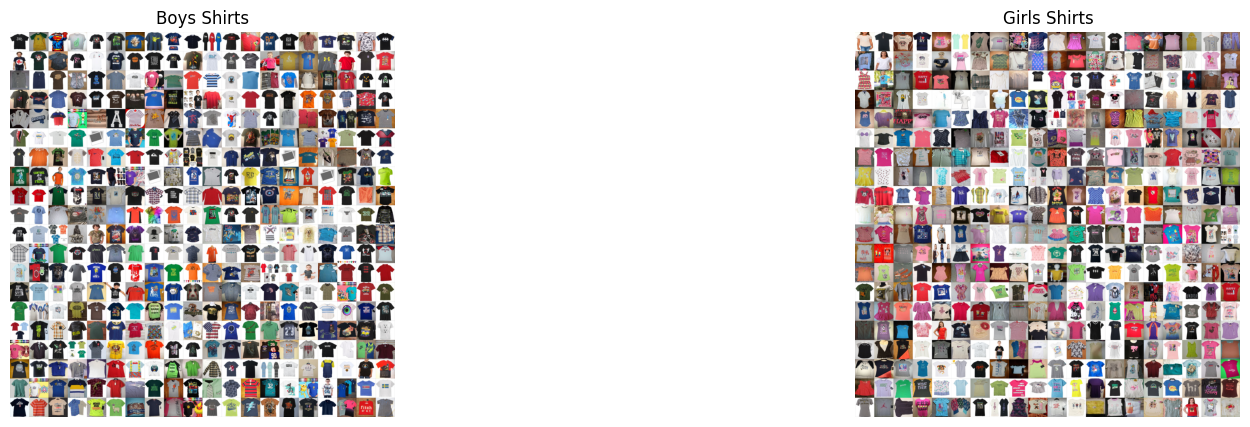

In [86]:
def merge_images(image_batch, size = [20, 20]):
    h,w = image_batch.shape[1], image_batch.shape[2]
    c = image_batch.shape[3]
    img = np.zeros((int(h*size[0]), w*size[1], c))
    for idx, im in enumerate(image_batch):
        i = idx % size[1]
        j = idx // size[1]
        img[j*h:j*h+h, i*w:i*w+w,:] = im/255.0 #notice we divide by 255 to get 0-1 float range
    return img

boys_merged = merge_images(boys_display_images)
girls_merged =merge_images(girls_display_images)
fig, ax = plt.subplots(ncols = 2, figsize = (20,5))

ax[0].set_title('Boys Shirts')
ax[0].axis('off')
_ = ax[0].imshow(boys_merged)

ax[1].set_title('Girls Shirts')
ax[1].axis('off')
_ = ax[1].imshow(girls_merged)

What would you say is the most obvious difference between boys and girls shirts images?

Let's look at the color histograms for the RGB channels for our images:

You'll need to know how to flatten a N-D numpy array:

In [87]:
a = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print('a 3d array:')
print(a)
print("it's shape:")
print(a.shape)
print("the 2d matrix on the first level of the 3d array")
print(a[:, :, 0])
print("the matrix's values flattened as a 1d array")
print(a[:, :, 0].flatten())

a 3d array:
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
it's shape:
(2, 2, 2)
the 2d matrix on the first level of the 3d array
[[1 3]
 [5 7]]
the matrix's values flattened as a 1d array
[1 3 5 7]


Complete the `plot_hist()` function to see all color histograms for boys and girls shirts images. See the function usage below for more hints regarding its expected input.

If you prefer you may change the code to use seaborn instead of matplotlib for the histogram construction.

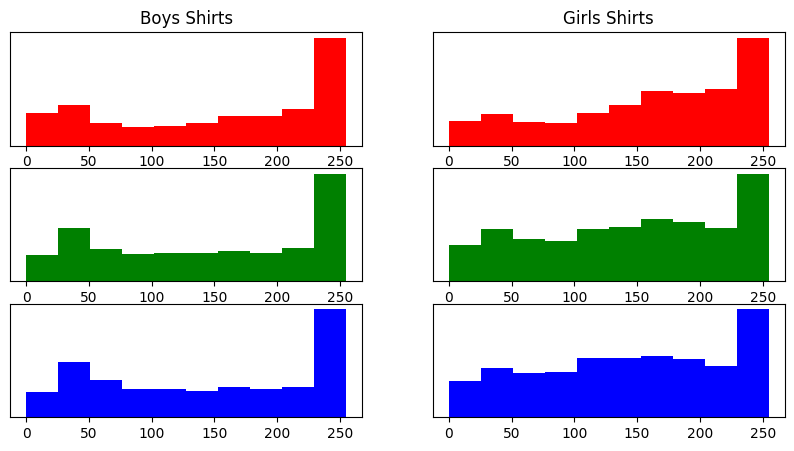

In [92]:
def plot_hist(images, channel, col):
    vals = images[: , : , : , channel].flatten()
    plt.hist(vals, color=col)
    plt.yticks([])

    
plt.figure(figsize =(10, 5))
plt.subplot(3, 2, 1)
plot_hist(boys_display_images, 0, 'red')
plt.title('Boys Shirts')
plt.subplot(3, 2, 2)
plot_hist(girls_display_images, 0, 'red')
plt.title('Girls Shirts')
plt.subplot(3, 2, 3)
plot_hist(boys_display_images, 1, 'green')
plt.subplot(3, 2, 4)
plot_hist(girls_display_images, 1, 'green')
plt.subplot(3, 2, 5)
plot_hist(boys_display_images, 2, 'blue')
plt.subplot(3, 2, 6)
plot_hist(girls_display_images, 2, 'blue')
plt.show()

What would you say is the most obvious difference between boys and girls shirts images?

### Q18, Q19, Q20.

See the channels mean and median verify your "feelings". Also print out the share of pixels above say 220:

In [112]:
def summary(images, channel, col):
    vals = images[:,:,:,channel].flatten()
    chan_mean = np.round(np.mean(vals),3)
    chan_median = np.round(np.median(vals), 3)
    chan_share_above_220 = np.round(len(vals[vals>220])/len(vals), 3)


    print('{} mean: {}, median: {}, share above 220: {}'.format(col, str(chan_mean), str(chan_median), str(chan_share_above_220)))

print('Boys:')
summary(boys_display_images, 0, 'red')
summary(boys_display_images, 1, 'green')
summary(boys_display_images, 2, 'blue')
print('Girls:')
summary(girls_display_images, 0, 'red')
summary(girls_display_images, 1, 'green')
summary(girls_display_images, 2, 'blue')

Boys:
red mean: 155.294, median: 174.0, share above 220: 0.338
green mean: 148.417, median: 154.0, share above 220: 0.304
blue mean: 146.584, median: 151.0, share above 220: 0.298
Girls:
red mean: 162.649, median: 176.0, share above 220: 0.288
green mean: 146.981, median: 153.0, share above 220: 0.224
blue mean: 146.202, median: 150.0, share above 220: 0.22


For the summary statistics of the red channel of Girl shirts, please fill in:

#### Q18: mean
#### Q19: median
#### Q20:  share above 220

In [113]:
ans['Q18'] =  162.649
ans['Q19'] = 176.0
ans['Q20'] =  0.288

# Finish!

* To submit your HW please run this last code block and follow the instructions.
* This code will create a CSV file in the current directory on your local machine or in your google drive (Google Colab)
* Please download it and upload it to the moodle HW1
* Make sure that you write your ID correctly!

In [114]:
import pandas as pd

df_ans = pd.DataFrame.from_dict(ans, orient='index')
if df_ans.shape[0] == 23:
  df_ans.to_csv('{}_{}.csv'.format(ans['HW'],str(ans['id_number'])))
else:
    print("seems like you missed a question, make sure you have run all the code blocks")

**For Google Colab users who want to save their CSV in their drive**

* Run the following script.
* Note that you will need to authorize GD once. For more information: https://colab.research.google.com/notebooks/io.ipynb (under Mounting Google Drive locally)
* You may change the path to be in your inner folder at GD, or not use GD at all and just manually download the CSV file to your local machine.
* Eventually upload the CSV to Moodle.

In [115]:
from google.colab import drive
drive.mount('/content/drive')

# Three options of the path of the file 
path ='/content/drive/MyDrive/' # general outer folder
# path = '/content/drive/MyDrive/Colab Notebooks/Intro_DS_2023/HW/HW3/' # assuming an inner folder called Intro_DS_2023 etc.
# path = './' # here, in this notebook environment

import pandas as pd 
df_ans = pd.DataFrame.from_dict(ans, orient='index')

if df_ans.shape[0] == 23:
  df_ans.to_csv(path+'{}_{}.csv'.format(ans['HW'],str(ans['id_number'])))
else:
    print("seems like you missed a question, make sure you have run all the code blocks")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
